# Implementações dos problemas de PLI - A2
### Disciplina: Programação Linear Inteira
### Integrantes: Daniel Jacob, Juliana Carrica, Wendell Oliveira
### Professor: Vincent Gerard Y. Guigues

In [1]:
import Pkg; Pkg.add("MathOptInterface")
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("DataFrames")
import Pkg; Pkg.add("GLPK")
import Pkg; Pkg.add("JuMP")

    Updating registry at `C:\Users\Daniel\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Daniel\.julia\environments\v1.10\Manifest.toml`


In [2]:
#Bibliotecas 
using JuMP
using GLPK
using Plots
using DataFrames

# Problema 1.1

In [5]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, x[1:2, 1:3] >= 0, Int)

# Função objetivo
c = [1 2 1.5; 2 3.5 2]  # Custos de transporte organizados por usina
@objective(model, Min, sum(x[i, j] * c[i, j] for i in 1:2, j in 1:3))

# Restrições de capacidade das usinas
@constraint(model, sum(x[1, j] for j in 1:3) <= 400)
@constraint(model, sum(x[2, j] for j in 1:3) <= 300)

# Restrições de demanda das fábricas
@constraint(model, sum(x[i,1] for i in 1:2) == 100)
@constraint(model, sum(x[i,2] for i in 1:2) == 200)
@constraint(model, sum(x[i,3] for i in 1:2) == 300)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Custo mínimo: ", objective_value(model))
println("Quantidades ótimas de transporte:")
for i in 1:2
    for j in 1:3
        println("x[$i, $j] = ", value(x[i, j]))
    end
end

# Imprimindo excedente no estoque
println("Excedente na usina 1: ", 400 -  value(sum(x[1, j] for j in 1:3)) )
println("Excedente na usina 2: ", 300 -  value(sum(x[2, j] for j in 1:3)) )

Custo mínimo: 1050.0
Quantidades ótimas de transporte:
x[1, 1] = 100.0
x[1, 2] = 200.0
x[1, 3] = 100.0
x[2, 1] = 0.0
x[2, 2] = 0.0
x[2, 3] = 200.0
Excedente na usina 1: 0.0
Excedente na usina 2: 100.0


# Problema 1.2

In [1]:
# Definindo o modelo
model_first = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model_first, p[1:2] >= 0, Int)

# Função objetivo
c = [7 9]  # Lucro por kilo de produto
@objective(model_first, Max, sum(p[j] * c[j] for j in 1:2))

# Restrições de limitação de matéria-prima
@constraint(model_first, p[1] + p[2] <= 8)
@constraint(model_first, 2p[1] + 3p[2] <= 19)
@constraint(model_first, p[2] <= 4)

# Resolvendo o modelo]
optimize!(model_first)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model_first))
println("Quantidades ótimas de produção:")
for i in 1:2
    println("T[$i] = ", value(p[i]))
end

#Exibindo o excedente de matéria-prima
println("Excedente Nitrato: ", 8 - ( value(p[1]) + value(p[2]) ))
println("Excedente Sal de Potássio: ", 19 - ( 2value(p[1]) + 3value(p[2])))
println("Excedente Fosfato: ", 4 -  (value(p[2]) ))




UndefVarError: UndefVarError: `GLPK` not defined

In [117]:
# Definindo o modelo
model_sec = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model_sec, P[1:3] >= 0, Int)

# Função objetivo
c = [8, 19, 4]  # Quantidade de nutrientes por quilo de produto disponível
@objective(model_sec, Min, sum(P[i] * c[i] for i in 1:3))

# Restrições de lucro por quilo de produto
@constraint(model_sec, P[1] + 2* P[2] >= 700)
@constraint(model_sec, P[1] +3P[2] + P[3] >= 900)

# Resolvendo o modelo
optimize!(model_sec)

# Imprimindo o resultado
println("Minimização do preço à granel: ", objective_value(model_sec))
println("Preço por granel:")
for i in 1:3
    println("P[$i] = ", value(P[i]))
end


Minimização do preço à granel: 6200.0
Preço por granel:
P[1] = 300.0
P[2] = 200.0
P[3] = 0.0


# Problema 1.3

In [118]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, q[1:2 , 1:3] >= 0, Int)

# Função objetivo
c = [38 27 48 ; 37 58 45]  # Custo de transporte por rota
@objective(model, Max, sum(q[i,j] * c[i,j] for i in 1:2, j in 1:3))

# Restrições de limitação de matéria-prima
@constraint(model, sum(q[1,j] for j in 1:3) <= 6)
@constraint(model, sum(q[2,j] for j in 1:3) <= 6)

# Restrições de demanda das fábricas
@constraint(model, sum(q[i,1] for i in 1:2) == 5)
@constraint(model, sum(q[i,2] for i in 1:2) == 4)
@constraint(model, sum(q[i,3] for i in 1:2) == 3)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Custo mínimo de distribuição: ", objective_value(model))
println("Quantidades ótimas de distribuição:")
for i in 1:2
    for j in 1:3
        println("q[$i, $j] = ", value(q[i, j]))
    end
end

#Exibindo as sobras de cada usina
println("Sobra na usina 1: ", 6 -  value(sum(q[1, j] for j in 1:3)) )
println("Sobra na usina 2: ", 6 -  value(sum(q[2, j] for j in 1:3)) )



Custo mínimo de distribuição: 564.0
Quantidades ótimas de distribuição:
q[1, 1] = 3.0
q[1, 2] = 0.0
q[1, 3] = 3.0
q[2, 1] = 2.0
q[2, 2] = 4.0
q[2, 3] = 0.0
Sobra na usina 1: 0.0
Sobra na usina 2: 0.0


# Problema 1.4

In [119]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, S >= 0, Int)
@variable(model, C >= 0, Int)

# Função objetivo
@objective(model, Max, 5S + 4C)

# Restrições de limitação de matéria-prima
@constraint(model, 2S+C <= 78)

# Restrições de horas trabalhadas
@constraint(model, 10S+12C == 600)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))
println("Quantidades ótimas de produção:")
println("S = ", value(S))
println("C = ", value(C))
#Horas trabalhadas 
println("Horas trabalhadas em sapatos: ", 10*value(S) )
println("Horas trabalhadas em cintos: ", 12*value(C) )


Lucro máximo: 240.0
Quantidades ótimas de produção:
S = 24.0
C = 30.0
Horas trabalhadas em sapatos: 240.0
Horas trabalhadas em cintos: 360.0


# Problema 1.5

In [120]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, QA >= 0, Int)
@variable(model, QB >= 0, Int)

# Função objetivo
@objective(model, Max, 20QA + 30QB)

# Restrições de limitação de matéria-prima
@constraint(model, (1/4)*QA <= 500)
@constraint(model, (1/4)*QA + (1/2)*QB<= 200)
@constraint(model, (1/2)*QA + (1/2)*QB<= 200)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))
println("Quantidades ótimas de produção:")
println("QA = ", value(QA))
println("QB = ", value(QB))

#Exibindo o excedente de matéria-prima
println("Excedente de A: ", 500 -  (1/4)*value(QA) )
println("Excedente de B: ", 200 -  (1/4)*value(QA) - (1/2)*value(QB) )
println("Excedente de C: ", 200 -  (1/2)*value(QA) - (1/2)*value(QB) )

Lucro máximo: 12000.0
Quantidades ótimas de produção:
QA = 0.0
QB = 400.0
Excedente de A: 500.0
Excedente de B: 0.0
Excedente de C: 0.0


# Problema 1.6 - a implementação diz que não tem resultado ótimo


In [16]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, q[1:4, 1:3], Int)

# Função objetivo
# c = [5.5, 4.5, 3.5]  # Venda dos diesel 1,2,3
c = [5.5, 4.5, 3.5]  # Teste
d = [3, 6, 4, 1] # Custo dos petróleos 1,2,3,4
# d = [3,1,1,1] #Teste

@objective(model, Max, sum(c[j]*sum(q[i,j] for i in 1:4) for j in 1:3) - sum(d[i]*sum(q[i,j] for j in 1:3) for i in 1:4))   


# @objective(model, Max, (sum(q[i,j] * c[j]) - sum(q[i,j] * d[i]))  for i in 1:4, j in 1:3)
                    # -sum((q[i,j] * d[i]) for i in 1:4, j in 1:3))

# @objective(model, Min, sum((q[i,j] * d[i]) for i in 1:4, j in 1:3))

# Restrições de composição
# Diesel A
@constraint(model, (0.3) * sum(q[i,1] for i in 1:4) >= q[1,1])
@constraint(model, (0.4) * sum(q[i,1] for i in 1:4) <= q[2,1])
@constraint(model, (0.5) * sum(q[i,1] for i in 1:4) >= q[3,1])
# Diesel B
@constraint(model, (0.5) * sum(q[i,2] for i in 1:4) >= q[1,2])
@constraint(model, (0.1) * sum(q[i,2] for i in 1:4) <= q[2,2])
# Diesel C
@constraint(model, (0.7) * sum(q[i,3] for i in 1:4) >= q[1,3])

# Restrições de matéria-prima
@constraint(model, sum(q[1,j] for j in 1:3) <= 3000)
@constraint(model, sum(q[2,j] for j in 1:3) <= 2000)
@constraint(model, sum(q[3,j] for j in 1:3) <= 4000)
@constraint(model, sum(q[4,j] for j in 1:3) <= 1000)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))

# Quantidades ótimas de produção de cada diesel
for j in 1:3
    println("Quantidade ótima de diesel tipo $j: ", sum(value(q[i,j]) for i in 1:4))
end

# Excedentes de matéria-prima
println("Excedente de matéria-prima:")
println("Excedente de 1: ", 3000 - sum(value(q[1,j]) for j in 1:3))
println("Excedente de 2: ", 2000 - sum(value(q[2,j]) for j in 1:3))
println("Excedente de 3: ", 4000 - sum(value(q[3,j]) for j in 1:3))
println("Excedente de 4: ", 1000 - sum(value(q[4,j]) for j in 1:3))


MathOptInterface.ResultIndexBoundsError{MathOptInterface.ObjectiveValue}: Result index of attribute MathOptInterface.ObjectiveValue(1) out of bounds. There are currently 0 solution(s) in the model.

# Problema 2.1 - Gestão da produção de eletricidade

In [201]:
#Quantidade de regiôes e fontes de energia
qtdd_hidreletricas = 4
qtdd_termicas = [3,4,2,3]

#quantidade de dias a ser feita previsão
T = 7

#quantidade de energia máxima que cada fonte pode gerar
V = [100, 150, 200, 250]
U = [50 100 150 200 ; 50 100 150 200 ; 50 100 150 200 ; 50 100 150 200]


#Custo de produção de cada usina térmica 
c = [10 15 20 0 ; 1 5 2 2.5 ; 15 15 0 0 ; 10 5 2 0]

#Preço da energia comprada no spot
spot = [200, 250, 300, 305, 400, 450, 500, 550, 600, 650, 700, 705, 800, 805, 900]

#Quantidade máxima de transferência de energia entre regiões
E = [0 100 100 100 ; 100 0 100 100 ; 100 100 0 100 ; 100 100 100 0]

#Quantidades mínimas e máximas dos reservatórios
m = [10, 10, 10, 10]
M = [1000, 1000, 1000, 1000]

#demandas diárias por região
# D = [100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 ;
#     100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 ;
#     100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 ;
#     100 150 200 250 300 350 400 450 500 550 600 650 700 750 800]
#demandas diárias por região
D = [500 750 600 750 800 800 700;
    600 650 700 750 800 800 800;
    400 450 500 550 600 600 500;
    100 150 200 650 700 700 800]

# afluências diárias em cada região
# A = [10 15 2 5 3 5 4 50 5 5 7 6.5 7 7.5 8 ;
#     100 150 20 50 30 50 40 50 50 55 60 65 70 75 80 ;
#     100 150 20 25 300 30 00 40 50 50 00 60 70 70 80 ;
#     1700 1500 2300 290 30 35 40 45 50 50 00 60 70 70 80]
A = [10 15 2 5 3 15 13;
    100 150 20 50 30 40 34;
    100 150 20 25 300 250 120;
    1700 1500 2300 290 30 70 90]
    
#quantidade de água no reservatório no primeiro dia
N = [10, 10, 10, 10]

# Definindo o modelo
model = Model(GLPK.Optimizer)

#Variáveis de decisão
#qtdd_energia_produzida_termicas
@variable(model, u[i = 1:qtdd_hidreletricas, j = 1:qtdd_termicas[i], 1:T] >= 0)

#qtdd_energia_produzida_hidreletricas
@variable(model, v[1:qtdd_hidreletricas,1:T] >= 0, Int)
 
#qtdd energia comprada spot
@variable(model, s[1:qtdd_hidreletricas,1:T] >= 0 , Int)

#qtdd_energia_trocada entre regiões
@variable(model, e[1:qtdd_hidreletricas,1:qtdd_hidreletricas,1:T] >= 0 , Int)

#quantidade de agua a deixar fluir
@variable(model, a[1:qtdd_hidreletricas,1:T] >= 0 , Int)

#quantidade de água deixada no reservatório pro dia seguinte
@variable(model, n[1:qtdd_hidreletricas,2:T] >= 0 , Int)

# Função objetivo
@objective(model, Min, sum(u[i,j,t] * c[i,j] for i in 1:qtdd_hidreletricas, j in 1:qtdd_termicas[i], t in 1:T)
                        + sum(s[i,t] * spot[t] for i in 1:qtdd_hidreletricas, t in 1:T))

# Restrições de produção de energia
#restrição de limitação das hidrelétricas
for i in 1:qtdd_hidreletricas
    for t in 1:T
        @constraint(model, v[i,t] <= V[i])
    end
end
#restrição de limitação das termicas
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_termicas[i]
        for t in 1:T
            @constraint(model, u[i,j,t] <= U[j,i])
        end
    end
end
#limitação de transferência entre regiões
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_hidreletricas
        if i != j
            for t in 1:T
                @constraint(model, e[i,j,t] <= E[i,j])
            end
        end
    end
end
#limitação de afluência de água
for i in 1:qtdd_hidreletricas
    for t in 2:T
        @constraint(model, a[i,t] <= n[i,t] + A[i,t] - v[i,t])
    end
end
#limitação de afluências no primeiros dia
for i in 1:qtdd_hidreletricas
    @constraint(model, a[i,1] <= N[i] + A[i,1] - v[i,1])
end
#volume de água ao dia
for i in 1:qtdd_hidreletricas
    for t in 1:T-1
        if t == 1
            #vol no reser + afluencia = energia + vazão + vol no reser dia seguinte
            @constraint(model, N[i] + A[i,t] == n[i,2] + a[i,t] + v[i,t])
        else    
        #vol no reser + afluencia = energia + vazão + vol no reser dia seguinte
        @constraint(model, n[i,t] + A[i,t]  == a[i,t] + v[i,t] + n[i,t+1])
        end
    end
end

#limitações dos reservatórios
for i in 1:qtdd_hidreletricas
    for t in 2:T
        @constraint(model, m[i] <= n[i,t] <= M[i])
    end
end
#demanda diária por região
for i in 1:qtdd_hidreletricas
    for t in 1:T
        #demanda = energia produzida + energia comprada + energia trocada
        @constraint(model, v[i,t] + sum(u[i,j,t] for j in 1:qtdd_termicas[i]) + s[i,t] + sum(e[j,i,t] for j in 1:qtdd_hidreletricas) - sum(e[i,j,t] for j in 1:qtdd_hidreletricas)== D[i,t])
    end
end
#restriçao de envio de usina pra mesma usina
#RESTRIÇÃO e[I,I,T] == 0
for i in 1:qtdd_hidreletricas
    @constraint(model,[t in 1:T],  e[i,i,t] == 0)
end
# #restrição de SOMENTE IDA de transferência de energia
# for i in 1:qtdd_hidreletricas
#     for j in 1:qtdd_hidreletricas
#         if i != j
#             @constraint(model,[t in 1:T],  e[i,j,t] == -e[j,i,t])
#         end
#     end
# end


#restrição de u[j i> mais que tem , t] = 0
#esse parece que resolvi

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Custo mínimo: ", objective_value(model))


Custo mínimo: 1.79245e6


In [202]:
#salvar em uma lista a evolução de produção diária de cada usina térmica
#definir matriz
results = Matrix{Any}(undef, sum(qtdd_termicas[i] for i in 1:qtdd_hidreletricas), T+1)
contador = 1
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_termicas[i]
        results[contador,1] = ["Reg.$i-Term.$j"]
        for t in 1:T
            results[contador,t+1]  = Int(value(u[i,j,t]))
        end
        contador += 1
    end
end
titles = ["Térmica|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Produção diária de cada usina térmica")
prod_termicas = DataFrame(results, titles)


Produção diária de cada usina térmica


Row,Térmica|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1-Term.1""]",50,50,50,50,50,50,50
2,"[""Reg.1-Term.2""]",50,50,50,50,50,50,50
3,"[""Reg.1-Term.3""]",50,50,50,50,50,50,50
4,"[""Reg.2-Term.1""]",100,100,100,100,100,100,100
5,"[""Reg.2-Term.2""]",100,100,100,100,100,100,100
6,"[""Reg.2-Term.3""]",100,100,100,100,100,100,100
7,"[""Reg.2-Term.4""]",100,100,100,100,100,100,100
8,"[""Reg.3-Term.1""]",150,150,150,150,150,150,150
9,"[""Reg.3-Term.2""]",150,150,150,150,150,150,150


In [203]:
#salvar em uma lista a evolução de produção diária de cada usina térmica
#definir matriz
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = ["Hidro.$i"]
        for t in 1:T
            results[i,t+1]  = Int(value(v[i,t]))
        end
    end
titles = ["Hidrelétricas|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Produção diária de cada hidrelétrica")
prod_hidro = DataFrame(results, titles)

Produção diária de cada hidrelétrica


Row,Hidrelétricas|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Hidro.1""]",0,0,0,0,0,0,73
2,"[""Hidro.2""]",0,0,0,0,134,150,150
3,"[""Hidro.3""]",0,0,95,200,200,200,200
4,"[""Hidro.4""]",250,250,250,250,250,250,250


In [205]:
#Compra diária de energia no mercado spot
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = ["Reg.$i"]
        for t in 1:T
            results[i,t+1]  = Int(value(s[i,t]))
        end
    end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Compra diária de energia no mercado spot")
compra_spot = DataFrame(results, titles)

Compra diária de energia no mercado spot


Row,Regiões|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1""]",250,400,350,500,550,550,427
2,"[""Reg.2""]",100,150,200,250,216,200,250
3,"[""Reg.3""]",0,150,5,50,100,100,0
4,"[""Reg.4""]",0,0,0,0,0,0,0


In [206]:
#Quantidade de afluência a ser liberada diariamente
#Compra diária de energia no mercado spot
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = ["Reg.$i"]
        for t in 1:T
            results[i,t+1]  = Int(value(a[i,t]))
        end
    end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Vazão diaria de água")
compra_spot = DataFrame(results, titles)

Vazão diaria de água


Row,Regiões|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1""]",0,0,0,0,0,0,0
2,"[""Reg.2""]",0,0,0,0,0,0,0
3,"[""Reg.3""]",0,0,0,0,80,0,0
4,"[""Reg.4""]",1450,1250,1540,0,0,0,0


In [207]:
#Tranferência de energia diária entre Regiões
results = Matrix{Any}(undef, qtdd_hidreletricas*qtdd_hidreletricas, T+1)
contador = 1
for i in 1:qtdd_hidreletricas
    for j in 1:qtdd_hidreletricas
            results[contador,1] = ["Reg.$i-Reg.$j"]
            for t in 1:T
                results[contador,t+1]  = Int(value(e[i,j,t]))
            end
            contador += 1
    end
end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(i))
end
println("Transferência de energia diária entre regiões")
trans_diaria = DataFrame(results, titles)

Transferência de energia diária entre regiões


Row,Regiões|Tempo,1,2,3,4,5,6,7
,Any,Any,Any,Any,Any,Any,Any,Any
1,"[""Reg.1-Reg.1""]",0,0,0,0,0,0,0
2,"[""Reg.1-Reg.2""]",0,0,0,0,0,0,0
3,"[""Reg.1-Reg.3""]",0,0,0,0,0,0,0
4,"[""Reg.1-Reg.4""]",0,0,0,0,0,0,0
5,"[""Reg.2-Reg.1""]",0,0,0,0,0,0,0
6,"[""Reg.2-Reg.2""]",0,0,0,0,0,0,0
7,"[""Reg.2-Reg.3""]",0,0,0,0,0,0,0
8,"[""Reg.2-Reg.4""]",0,0,0,0,0,0,0
9,"[""Reg.3-Reg.1""]",0,100,0,0,0,0,0


Custo diário de produção por região
4×8 DataFrame
 Row │ Regiões|Tempo  1       2        3        4         5         6         7        
     │ Any            Any     Any      Any      Any       Any       Any       Any      
─────┼─────────────────────────────────────────────────────────────────────────────────
   1 │ Reg.1          1250.0  64750.0  47250.0  124250.0  182250.0  204750.0  202250.0
   2 │ Reg.2          1050.0  1050.0   16050.0  31550.0   81050.0   91050.0   126050.0
   3 │ Reg.3          3750.0  4500.0   4500.0   19750.0   44500.0   49500.0   4500.0
   4 │ Reg.4          300.0   400.0    650.0    3400.0    3400.0    3400.0    3400.0


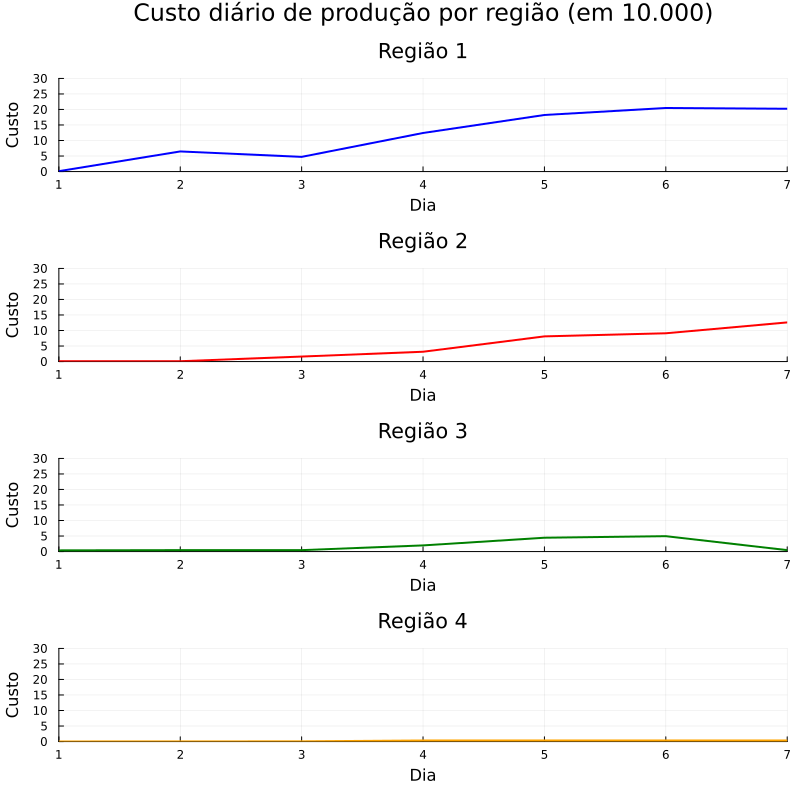

In [195]:
#Determinar custo diarios de produção por região (transferência entre regiões não gera despesas)
results = Matrix{Any}(undef, qtdd_hidreletricas, T+1)
for i in 1:qtdd_hidreletricas
    results[i,1] = "Reg.$i"
    for t in 1:T
        custo_spot = value(s[i,t]) * spot[t]
        custo_termicas = 0
        for j in 1:qtdd_termicas[i]
            custo_termicas += value(u[i,j,t]) * c[i,j]
        end

        results[i,t+1] = custo_spot + custo_termicas
    end
end
titles = ["Regiões|Tempo"]  # Definindo 'titles' como uma lista vazia antes do loop
for i in 1:T
    push!(titles, string(Int(i)))
end
println("Custo diário de produção por região")
custo_diario = DataFrame(results, titles)
#plotar gráfico de linhas 
println(custo_diario)
#escalonar valores de results para plotar
results_escalonada = results[1:qtdd_hidreletricas,2:T+1] / 10000

n_rows = qtdd_hidreletricas
n_cols = 1
layout = (n_rows, n_cols)

# Definindo cores para as linhas do gráfico
cores = [:blue, :red, :green, :orange, :purple, :yellow, :cyan, :magenta, :brown, :black]
plots = []

# Criando um gráfico pequeno para cada região
for i in 1:qtdd_hidreletricas
    plotar = plot(1:T, results_escalonada[i,1:end], legend=false, color=cores[i], linewidth=2,
             xlabel="Dia", ylabel="Custo",
             title="Região $i",
             xlims=(1, T), ylims=(0, 30),
             xticks=1:T, yticks=0:5:30,
             size=(800, 800))
    push!(plots, plotar)
end
 
# Criando o gráfico combinado
plotar_custo = plot(plots..., layout=layout, plot_title="Custo diário de produção por região (em 10.000)")


# Problema 2.2 - Gestão de carreiras

In [129]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, q[1:5] >= 0)  

# Função objetivo
c = [0.05; 0.065; 0.057; 0.052; 0.1] 
@objective(model, Max, sum(q[i] * c[i] for i in 1:5)) 
# Restrições de limitação de investimento
@constraint(model, sum(q[i] for i in 1:5) == 100000)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Retorno: ", objective_value(model) + 100000)  
println("Lucro obtido: ", objective_value(model)) 
println("Investimento em cada ativo:")
for i in 1:5
    println("q[$i] = ", value(q[i]))
end



Retorno: 110000.0
Lucro obtido: 10000.0
Investimento em cada ativo:
q[1] = 0.0
q[2] = 0.0
q[3] = 0.0
q[4] = 0.0
q[5] = 100000.0


# Problema 2.3 - Planificação da expansão de produção

In [130]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# custo de unidades não vendidas
p = [400 400 400]
# custo de horas extras
c = [2.5 3.75 5 3]
#tempo de revisão de cada máquina por hora trabalhada
t = [0.08 0.04 0.03 0.01]
#horas disponíveis de cada maquina
hd = [500 500 500 500]
#tempo máximo de trabalho de cada máquina
u = [2000 2000 3000 3000]
# u = [1000 1000 1000 1000]
# Taxa de produção de i em j
a = [0.6 0.6 0.9 0.8; 0.1 0.9 0.6 0.8; 0.05 0.2 0.5 0.8]
#Custo por hora de produção de i em j
q = [2.6 3.4 3.4 2.5; 1.5 2.4 2 3.6; 4 3.8 3.5 3.2]
#demanda numa semana
d = [1800 600 3000]

# Variáveis de decisão
# h[i] = horas convencionais de trabalho em cada máquina
@variable(model, hc[1:4] >= 0)  
# e[j] = horas extras de trabalho em cada máquina
@variable(model, e[1:4] >= 0)
# tempo H[i,j] de confecção de i em j
@variable(model, H[1:3, 1:4] >= 0)

# Função objetivo
@objective(model, Min, sum(q[i,j] * H[i,j] for i in 1:3, j in 1:4) + 
                sum(c[j] * e[j] for j in 1:4) +
                sum(p[i]*(d[i] - sum(a[i,j]*H[i,j] for j in 1:4)) for i in 1:3))
             
# Restrições de horas por máquina
@constraint(model,[j in 1:4], hc[j] + e[j]  <= u[j])
# Restrições de horas de revisão
@constraint(model,sum(t[j]*(e[j] + hc[j]) for j in 1:4)  <= 100 )
# Limitação de horas contratadas
@constraint(model,[j in 1:4],hc[j] <= hd[j] )
# Restrições de demanda
@constraint(model,[i in 1:3], sum(a[i,j]*H[i,j] for j in 1:4) <= d[i] )
# Restrições de soma de horas por máquina
@constraint(model,[j in 1:4], sum(H[i,j] for i in 1:3) == hc[j] + e[j] )
# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Custo total: ", round(objective_value(model)))

Custo total: 422000.0


In [131]:
# Criando uma matriz para armazenar os resultados
results = Matrix{Any}(undef, 7, 8)

#1x1 -  4x8
for j in 1:4
    results[j, 1] = "Máquina $j"
    results[j, 2] = round(value(e[j]))
    results[j, 3] = round(value(hc[j]))
    results[j, 4] = round(value(hc[j]+ e[j]))
    results[j, 5] = round(value((e[j] + hc[j])*t[j]))
    for i in 1:3
        results[j, 5 + i] = round(value(H[i,j]*a[i,j]))
    end
end

results[5, 5] = "Q-Produzidos"
results[6, 5] = "Q-Não vendidos"
results[7, 5] = "Q-Demanda"
for i in 1:3
    results[5, 5+i] = round(sum(value(H[i,j]*a[i,j]) for j in 1:4))
    results[6, 5+i] = round(value(d[i] - sum(value(H[i,j]*a[i,j]) for j in 1:4)))
    results[7, 5+i] = d[i]
end
for i in 5:7
    for j in 1:4
        results[i,j] = ""
    end
end

# Criando um DataFrame
df = DataFrame(results, ["Máquina", "H-Extra", "H-Disponível", "H-Total", "H-Revisão", "Q-Produto 1", "Q-Produto 2", "Q-Produto 3"])
#definindo titulo das colunas do DataFrame

# Exibindo o DataFrame
println(df)
# show(df, hlines = 5:5)


7×8 DataFrame
 Row │ Máquina    H-Extra  H-Disponível  H-Total  H-Revisão       Q-Produto 1  Q-Produto 2  Q-Produto 3 
     │ Any        Any      Any           Any      Any             Any          Any          Any         
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Máquina 1  0.0      0.0           0.0      0.0             0.0          0.0          0.0
   2 │ Máquina 2  0.0      250.0         250.0    10.0            0.0          225.0        0.0
   3 │ Máquina 3  1500.0   500.0         2000.0   60.0            1800.0       0.0          0.0
   4 │ Máquina 4  2500.0   500.0         3000.0   30.0            0.0          0.0          2400.0
   5 │                                            Q-Produzidos    1800.0       225.0        2400.0
   6 │                                            Q-Não vendidos  0.0          375.0        600.0
   7 │                                            Q-Demanda       1800         600     

# Problema 2.4 - Gestão de contratos com opção de cancelamento

# Problema 2.5 - Problema da mochila

In [133]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, x[1:25], Bin)  

# Função objetivo
# Lista de objetos úteis para uma viagem às montanhas da Cordilheira dos Andes
objetos = [
    "Barraca resistente ao frio", "Saco para baixas temperaturas",
    "Papel Higiênico", "Panela leve para cozinhar", "Canivete suíço",
    "Cordas de escalada", "Capacete de escalada", "Mosquetões",
    "Roupas térmicas", "Luvas resistentes ao frio", "Gorro de lã",
    "Óculos de sol com proteção UV", "Botas de trekking impermeáveis",
    "Mapa da região", "GPS portátil", "Cantil de água", "Comida em pó",
    "Protetor solar de alta proteção", "Kit de primeiros socorros",
    "Lanterna de cabeça", "Bússola", "Kit escalada",
    "Bolsa estanque para objetos importantes", "Mochila de trekking",
    "Garrafa térmica"
]

# Lista de valores numéricos da utilidade de cada objeto
utilidade = [
    9, 10, 8, 7, 6, 9, 9, 8, 10, 9, 8, 7, 9, 7, 8, 7, 9, 7, 10, 8, 7, 8, 7, 8, 9, 8
]

# Lista de pesos dos objetos (em kg)
pesos = [
    3, 2, 1, 0.5, 0.2, 4, 0.5, 0.3, 2, 0.3, 0.1, 0.1, 1.5, 0.1, 0.3, 0.2, 0.5, 0.1, 0.5,
    0.3, 0.2, 0.3, 0.2, 2, 0.5
]

@objective(model, Max, sum(utilidade[i] * x[i] for i in 1:25)) 

# Restrições de limite de carga
@constraint(model, sum( x[i] * pesos[i] for i in 1:25) <= 10)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Utilidade máxima: ", objective_value(model))  
println("Peso atingido: ", sum(pesos[i]*value(x[i]) for i in 1:25)) 
println("Objetos escolhidos:")
contador = 1
for i in 1:25
    if value(x[i]) > 0
        println(contador,".", objetos[i])
        contador+=1
    end
end


Utilidade máxima: 168.0
Peso atingido: 9.7
Objetos escolhidos:
1.Papel Higiênico
2.Panela leve para cozinhar
3.Canivete suíço
4.Capacete de escalada
5.Mosquetões
6.Roupas térmicas
7.Luvas resistentes ao frio
8.Gorro de lã
9.Óculos de sol com proteção UV
10.Botas de trekking impermeáveis
11.Mapa da região
12.GPS portátil
13.Cantil de água
14.Comida em pó
15.Protetor solar de alta proteção
16.Kit de primeiros socorros
17.Lanterna de cabeça
18.Bússola
19.Kit escalada
20.Bolsa estanque para objetos importantes
21.Garrafa térmica


# Problema 2.6 - Unit Commitment

In [134]:
#Definindo o modelo
model = Model(GLPK.Optimizer)

#Custo fixo por ligar uma usina
cfixo = [100, 200, 150, 250, 300, 200, 150, 250, 300, 200]

#Produção máxima de cada usina
U = [1000, 2000, 1500, 2500, 3000, 2000, 1500, 2500, 3000, 2000]

#Custo linear de Produção
cprod = [10, 20, 15, 25, 30, 20, 15, 25, 30, 20]

#Demandas
D = [1000, 2000, 1500, 2500, 3000, 2000, 1500, 2500, 3000, 2000, 9000, 10000]

#Variáveis de decisão
#Usina i ligada no mes ts
@variable(model, y[1:12, 1:10], Bin)
#Quantidade de energia que cada usina vai produzir mensalmente
@variable(model, u[1:12, 1:10], Int)

#Função objetivo
@objective(model, Min, sum(cfixo[i]*y[12, i] for i in 1:10) + sum(cprod[i]*u[t,i] for i in 1:10, t in 1:12))

#Restrições
#Produção máxima de cada usina
@constraint(model, [i in 1:10, t in 1:12], u[t,i] <= y[t,i]*U[i])
#Demanda
@constraint(model, [t in 1:12], sum(u[t,i] for i in 1:10) >= D[t])
#Manter usina ligada 
@constraint(model, [i in 1:10, t in 2:12], y[t,i] >= y[t-1,i])
#Produção positiva
@constraint(model, [i in 1:10, t in 1:12], u[t,i] >= 0)

#Resolvendo o modelo
optimize!(model)

#Imprimindo o resultado
println("Custo total: ", objective_value(model))
println("Usinas ligadas:")
for i in 1:10
    for t in 1:12
            if t ==1 && value(y[t,i]) == 1
                println("Usina $i ligada no mês $t")
            elseif value(y[t,i]) == 1 && value(y[t-1,i]) == 0
                println("Usina $i ligada no mês $t")
            end 
        end
    end

Custo total: 596000.0
Usinas ligadas:
Usina 1 ligada no mês 1
Usina 2 ligada no mês 11
Usina 3 ligada no mês 2
Usina 6 ligada no mês 11
Usina 7 ligada no mês 5
Usina 10 ligada no mês 11


10×13 DataFrame
 Row │ Usina  Mês 1  Mês 2  Mês 3  Mês 4  Mês 5  Mês 6  Mês 7  Mês 8  Mês 9  Mês 10  Mês 11  Mês 12 
     │ Any    Any    Any    Any    Any    Any    Any    Any    Any    Any    Any     Any     Any    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1      1000   1000   1000   1000   1000   1000   1000   1000   1000   1000    1000    1000
   2 │ 2      0      0      0      0      0      0      0      0      0      0       1000    2000
   3 │ 3      0      1000   500    1500   500    0      0      0      500    0       1500    1500
   4 │ 4      0      0      0      0      0      0      0      0      0      0       0       0
   5 │ 5      0      0      0      0      0      0      0      0      0      0       0       0
   6 │ 6      0      0      0      0      0      0      0      0      0      0       2000    2000
   7 │ 7      0      0      0      0      1500   1000   500    1500   1500   1000    1500    1500
 

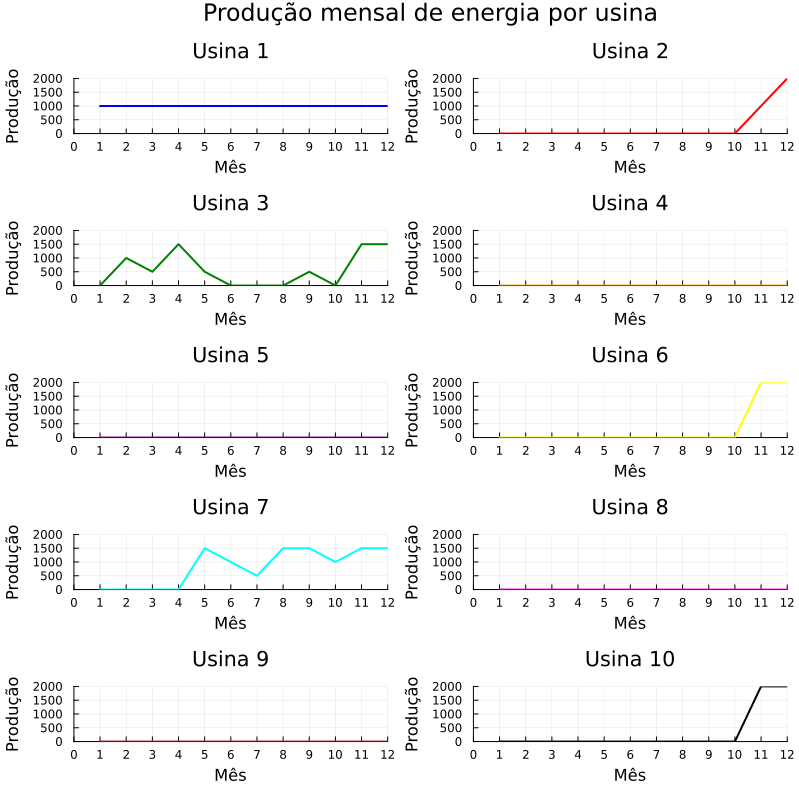

In [135]:
using DataFrames

# Criando a matriz de dados
dados = Matrix{Any}(undef, 10, 13)

# Adicionando títulos à primeira coluna
for i in 1:10
    dados[i, 1] = "$i"
end

# Preenchendo os dados das usinas
for i in 1:10
    for t in 2:13
        dados[i, t] = Int(value(u[t-1,i]))
    end
end

# Criando um DataFrame
titles = ["Usina", "Mês 1", "Mês 2", "Mês 3", "Mês 4", "Mês 5", "Mês 6", "Mês 7", "Mês 8", "Mês 9", "Mês 10", "Mês 11", "Mês 12"]
df = DataFrame(dados, titles)

# Exibindo o DataFrame
# show(df)
println(df)


# Configuração do layout dos subplots
n_rows = 5
n_cols = 2
layout = (n_rows, n_cols)

# Definindo cores para as linhas do gráfico
cores = [:blue, :red, :green, :orange, :purple, :yellow, :cyan, :magenta, :brown, :black]
plots = []
# titulo = plot(title="Supertitle",framestyle=nothing,showaxis=false,xticks=false,yticks=false,margin=0)
# push!(plots, titulo)
# Criando um gráfico pequeno para cada usina
for i in 1:10
    p = plot(1:12, dados[i,2:end], legend = false, color=cores[i], linewidth=2,
             xlabel="Mês", ylabel="Produção",
             title="Usina $i",
             xlims=(0, 12), ylims=(0, 2000),
             xticks=0:12, yticks=0:500:2000,
             size=(800, 800))
    push!(plots, p)
end
 
# Exibindo os subplots em um layout
p_combined = plot(plots..., layout=layout, plot_title = "Produção mensal de energia por usina")

p_combined  # Exibindo o plot conjunto

# Problema 3.1


In [31]:
#Definindo o modelo 
model = Model(GLPK.Optimizer)

c = [5.5, 4.5, 7.5, 11.25] #custo de produção de cada produto

#matéria prima disponível
M = [8000 4250 16000 2000]
#Variáveis de decisão
#quantidade de produtos revendidos sem transformações
@variable(model, L[1:4], Int)
#quantidade de líquido enviado para misturas
@variable(model, q[1:4, 1:3], Int)
#quantidades E e G para produzir P
@variable(model, E, Int)
@variable(model, G, Int)

@objective(model, Max, 
    228 * (G + E) +
    14 * (sum(q[i,3] for i in 1:4) - G) +
    11 * (sum(q[i,1] for i in 1:4) - E) +
    15 * sum(q[i,2] for i in 1:4) +
    6 * sum(L[i] for i in 1:4) - 
    sum(c[i] * (L[i] + sum(q[i,j] for j in 1:3)) for i in 1:4)
)

#Restrições
#Matéria prima disponível
@constraint(model,[i in 1:3], sum(q[j,i] for j in 1:4) <= M[i])

#restrições de produção mínima
@constraint(model, sum(q[i,1] for i in 1:4) >= 400)
@constraint(model, sum(q[i,2] for i in 1:4) >= 800)
@constraint(model, sum(q[i,3] for i in 1:4) >= 200)

#restrições de E e G max 
@constraint(model, E <= sum(q[i,1] for i in 1:4))
@constraint(model, G <= sum(q[i,3] for i in 1:4))

#restrições de composição
#elemento E
@constraint(model, q[1,1] == 0.3(sum(q[i,1] for i in 1:4)))
@constraint(model, q[2,1] <= 0.1(sum(q[i,1] for i in 1:4)))
@constraint(model, q[3,1] == 0.4(sum(q[i,1] for i in 1:4)))
@constraint(model, q[4,1] >= 0.05(sum(q[i,1] for i in 1:4)))
#elemento F
@constraint(model, q[1,2] <= 0.25(sum(q[i,2] for i in 1:4)))
@constraint(model, q[2,2] >= 0.2(sum(q[i,2] for i in 1:4)))
@constraint(model, q[3,2] == 0.2(sum(q[i,2] for i in 1:4)))
@constraint(model, q[4,2] <= 0.1(sum(q[i,2] for i in 1:4)))
#elemento G
@constraint(model, q[1,3] == 0.2(sum(q[i,3] for i in 1:4)))
@constraint(model, q[2,3] <= 0.15(sum(q[i,3] for i in 1:4)))
@constraint(model, q[3,3] == 0.4(sum(q[i,3] for i in 1:4)))
@constraint(model, q[4,3] >= 0.2(sum(q[i,3] for i in 1:4)))
#elemento P 
@constraint(model, (1/3)*(E+G) == E)
@constraint(model, (2/3)*(E+G) == G)

# Resolvendo o modelo
optimize!(model)

# Imprimindo o resultado
println("Lucro máximo: ", objective_value(model))

#Exibir quantidade de cada composto comprado
println("Quantidade de cada composto comprado:")
for i in 1:4
    println("Quantidade de L$i: ", value(L[i]))
end

#Exibir quantidade de cada composto produzido
println("Quantidade de cada composto produzido:")
for j in 1:3
        println("Quantidade de mistura $j: ", sum(value(q[i,j]) for i in 1:4))
end

#Exibir quantidade de P produzido
println("Quantidade de P produzido: ", value(E+G))



MathOptInterface.ResultIndexBoundsError{MathOptInterface.ObjectiveValue}: Result index of attribute MathOptInterface.ObjectiveValue(1) out of bounds. There are currently 0 solution(s) in the model.

# Problema 3.2

In [30]:
# Definindo o modelo
model = Model(GLPK.Optimizer)

# Variáveis de decisão
@variable(model, q[1:3, 2:3], Int)

# Função objetivo
@objective(model, Min, 90*q[1,2] + 80*q[1,3] + 60*q[2,2] + 50*q[2,3] + 30*q[3,2] + 40*q[3,3])

# Restrições de produção
@constraint(model, sum(q[i,2] for i in 1:3) <= 30)
@constraint(model, sum(q[i,3] for i in 1:3) <= 20)

# Restrições de demanda
@constraint(model, sum(q[i,2] for i in 1:3) == 10)
@constraint(model, sum(q[i,3] for i in 1:3) == 30)

# Resolver o modelo
optimize!(model)

# Imprimir o resultado
println("Custo mínimo: ", objective_value(model))

# #criar matriz
# results = Matrix{Any}(undef, 4, 3)
# results[1,1] = "Demanda"
# results[2,1] = "Eletricidade"
# results[3,1] = "Gás natural"
# results[4,1] = "Painéis Solares"
# results[1,2] = 20
# results[1,3] = 0
# results[1,4] = 0
# #add demandas na primeira linha
# for i in 1:3
#     results[1,i+1] = d[i]
# end
# #add quantidade de cada recurso
# for i in 1:3
#     for j in 2:3
#         results[i+1,j+1] = Int(value(q[i,j]))
#     end
# end


MathOptInterface.ResultIndexBoundsError{MathOptInterface.ObjectiveValue}: Result index of attribute MathOptInterface.ObjectiveValue(1) out of bounds. There are currently 0 solution(s) in the model.